In [ ]:
pip install datapackage

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from statistics import mean
from plotly.subplots import make_subplots
#import plotly.graph_objs as go
import seaborn as sns

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
df=pd.read_csv("case_time_series(1).csv")

In [ ]:
df.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,2020-01-30,1,1,0,0,0,0
1,31 January,2020-01-31,0,1,0,0,0,0
2,01 February,2020-02-01,0,1,0,0,0,0
3,02 February,2020-02-02,1,2,0,0,0,0
4,03 February,2020-02-03,1,3,0,0,0,0


In [ ]:

df1=pd.read_csv('case_time_series(1).csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             410 non-null    object
 1   Date_YMD         410 non-null    object
 2   Daily Confirmed  410 non-null    int64 
 3   Total Confirmed  410 non-null    int64 
 4   Daily Recovered  410 non-null    int64 
 5   Total Recovered  410 non-null    int64 
 6   Daily Deceased   410 non-null    int64 
 7   Total Deceased   410 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 25.8+ KB


In [ ]:
df1.tail()


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
405,10 March,2021-03-10,22851,11285270,18154,10936116,125,157633
406,11 March,2021-03-11,23298,11308568,15092,10951208,119,157752
407,12 March,2021-03-12,24845,11333413,19972,10971180,140,157892
408,13 March,2021-03-13,25154,11358567,16508,10987688,159,158051
409,14 March,2021-03-14,26513,11385080,17590,11005278,120,158171


In [ ]:
#Recovery_rate using direct formula

In [ ]:
recovery_rate=round(df1['Total Recovered']/df1['Total Confirmed']*100,2)

In [ ]:
recovery_rate

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
405    96.91
406    96.84
407    96.80
408    96.73
409    96.66
Length: 410, dtype: float64

In [ ]:
#recovery rate using new formula by Dr. Bhapkar

In [ ]:
from statistics import mean
i=0
n=410
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

recovery_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))  
print(recovery_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10554854, 10754689, 10929070, 11143930, 11334180]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33, 33.33, 33.33, 66.67, 66.67, 66.67, 66.67, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 9.52, 9.52, 9.52, 23.81, 23.81, 2.69, 2.9, 3.11, 3.11, 4.14, 4.76, 4.76, 4.76, 5.18, 8.28, 8.9, 10.35, 15.53, 17.6, 21.12, 2.66, 2.92, 3.29, 3.71, 4.47, 5.56, 6.4, 7.66, 9.12, 10.99, 12.35, 15.29, 18.9, 21.12, 23.3, 6.67, 7.37, 8.63, 9.96, 12.04, 13.94, 15.98, 19.42, 21.34, 24.48, 26.84, 29.0, 31.86, 34.69, 37.79, 15.69, 16.86, 18.65, 20.2, 21.89, 23.91, 26.32, 28.48, 31.23, 33.29, 35.93, 39.03, 41.97, 45.52, 49.17, 23.27, 25.13, 28.46, 30.57, 32.63, 35.15, 37.74, 40.34, 43.06, 45.2, 47.93, 50.43, 53.41, 56.27

In [ ]:
len(recovery_r)

410

In [ ]:
df2=df1
df2['Recovery_r']=recovery_r
df2['Recovery_rate']=recovery_rate


In [ ]:
df2.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate
405,10 March,2021-03-10,22851,11285270,18154,10936116,125,157633,96.49,96.91
406,11 March,2021-03-11,23298,11308568,15092,10951208,119,157752,96.62,96.84
407,12 March,2021-03-12,24845,11333413,19972,10971180,140,157892,96.80,96.80
408,13 March,2021-03-13,25154,11358567,16508,10987688,159,158051,96.94,96.73
409,14 March,2021-03-14,26513,11385080,17590,11005278,120,158171,97.10,96.66


In [ ]:
#fatality rate using normal formula

In [ ]:
fatality_rate = round(df1['Total Deceased']/df1['Total Confirmed']*100,2)

In [ ]:
print(fatality_rate)

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
405    1.40
406    1.39
407    1.39
408    1.39
409    1.39
Length: 410, dtype: float64


In [ ]:
#fatality rate using Dr. Bhapkar's formula

In [ ]:
from statistics import mean
i=0
n=410
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

fatality_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        fatality_r.append(round(df1['Total Deceased'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        fatality_r.append(round(df1['Total Deceased'][i]/list2[j] * 100,2))  
print(fatality_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10554854, 10754689, 10929070, 11143930, 11334180]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.38, 2.38, 4.76, 0.41, 0.41, 0.62, 0.62, 0.83, 0.83, 0.83, 1.45, 1.86, 2.07, 2.28, 3.31, 3.93, 4.97, 5.59, 0.8, 0.91, 1.03, 1.34, 1.61, 1.87, 2.29, 2.61, 3.13, 3.52, 4.41, 4.84, 5.64, 6.46, 6.98, 1.93, 2.07, 2.19, 2.38, 2.55, 2.73, 2.9, 3.15, 3.33, 3.53, 3.81, 4.03, 4.3, 4.59, 4.92, 2.01, 2.15, 2.29, 2.46, 2.72, 2.91, 3.15, 3.32, 3.52, 3.7, 3.91, 4.12, 4.27, 4.49, 4.75, 2.2, 2.29, 2.39, 2.51, 2.62, 2.74, 2.85, 2.98, 3.09, 3.21, 3.34, 3.47, 3.61, 3.77, 3.91, 2.09, 2.18, 2.27, 2.35, 2.45, 2.56, 2.67, 2.79, 2.92, 3.03, 3.14, 3.25, 3.4, 3.57, 3

In [ ]:
#
df2['Fatality_r'] = fatality_r
df2['Fatality_rate'] = fatality_rate
df2.tail()
#df2.drop('Fatality_rate',inplace=True,axis=1)
#df2.info()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_r,Recovery_rate,Fatality_r,Fatality_rate
405,10 March,2021-03-10,22851,11285270,18154,10936116,125,157633,96.49,96.91,1.39,1.40
406,11 March,2021-03-11,23298,11308568,15092,10951208,119,157752,96.62,96.84,1.39,1.39
407,12 March,2021-03-12,24845,11333413,19972,10971180,140,157892,96.80,96.80,1.39,1.39
408,13 March,2021-03-13,25154,11358567,16508,10987688,159,158051,96.94,96.73,1.39,1.39
409,14 March,2021-03-14,26513,11385080,17590,11005278,120,158171,97.10,96.66,1.40,1.39


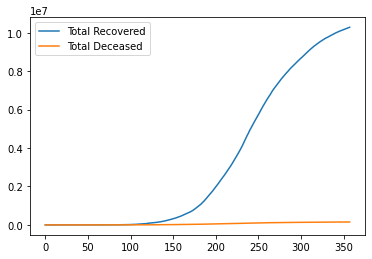

In [ ]:
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

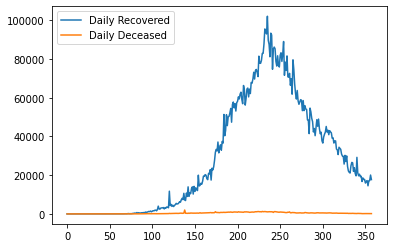

In [ ]:
df2['Daily Recovered'].plot()
df2['Daily Deceased'].plot()
plt.legend()

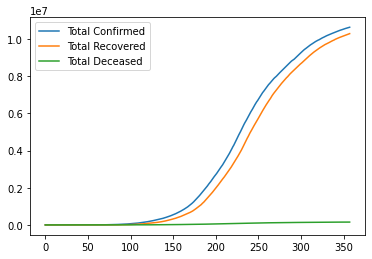

In [ ]:
df2['Total Confirmed'].plot()
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=df1['Date_YMD'], y=df1['Daily Recovered'], name="Daily Recovered"),secondary_y=False)

figd.add_trace(go.Scatter(x=df1['Date_YMD'], y=df1['Daily Deceased'], name="Daily Deceased"),secondary_y=True)

figd.update_layout(title_text="Daily Recovered vs Daily Deceased COVID19")

figd.update_xaxes(title_text="Date_YMD")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Daily Recovered and Deceased", secondary_y=False)

figd.show()

In [ ]:
figt = make_subplots(specs=[[{"secondary_y": True}]])

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Confirmed'], name="Total Confirmed"), secondary_y=False)

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Recovered'], name="Total Recovered"),secondary_y=False)

figt.add_trace(go.Scatter(x=df2['Date_YMD'], y=df2['Total Deceased'], name="Total Deceased"),secondary_y=True)

figt.update_layout(title_text="Total Confirmed vs Total Recovered vs Total Deceased COVID19")

figt.update_xaxes(title_text="Date_YMD")

#figt.update_yaxes(title_text="Total Confirmed", secondary_y=True)
#figt.update_yaxes(title_text="Total Recovered", secondary_y=False)
figt.update_yaxes(title_text="Total Confirmed, Recovered and Deceased", secondary_y=False)

figt.show()

In [ ]:
#fig=px.line(df2, x='Date_YMD', y=['Daily Recovered','Daily Deceased'], hover_name='Date_YMD', title='Daily Recovered vs Daily Deceased-COVID19')
#fig.show()

In [ ]:
#fig1=px.line(df2,x='Date_YMD',y=['Total Confirmed','Total Recovered','Total Deceased'], hover_name='Date_YMD',title='Total Confirmed vs Total Recovered vs Total Deceased-COVID19')
#fig1.show()

In [ ]:
def data_():
  df=pd.read_csv("https://api.covid19india.org/csv/latest/case_time_series.csv")
  df['Date_YMD']=pd.to_datetime(df['Date_YMD'])
  return df

In [ ]:
def recovery_fatality(df1,col1,col2):
  i=0
  n=len(df1['Date_YMD'])
  list1=df1[col1]
  list2=[]
  while i<=n:
      list2.append(round(mean(list1[i:i+15])))
      i+=15
  fatality_r=[]
  j=0
  for i in range(n):
      if i %15 != 0 or i == 0:
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))
      elif i % 15 == 0 :
          j+=1
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))  
  return(fatality_r)

In [ ]:
def plot_graph_data(A,B,C,D,E,F):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=A, y=B, name=E,fill='tozeroy'),secondary_y=False)
  figd.add_trace(go.Scatter(x=A, y=C, name=F,fill='tonexty'),secondary_y=True)

  figd.update_layout(title_text=E+" vs "+F)

  figd.update_xaxes(title_text=D)

  figd.update_yaxes(title_text=E, secondary_y=False)
  figd.show()
  #return(figd)
  

In [ ]:
def plot_graph_2(a,b,c,d):
  figt = make_subplots(specs=[[{"secondary_y": True}]])

  figt.add_trace(go.Scatter(x=a, y=b, name="Total Confirmed"), secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=c, name="Total Recovered"),secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=d, name="Total Deceased"),secondary_y=True)

  figt.update_layout(title_text="Total Confirmed vs Total Recovered vs Total Deceased COVID19")

  figt.update_xaxes(title_text="Date_YMD")

  figt.update_yaxes(title_text="Total Confirmed, Recovered and Deceased", secondary_y=False)

  figt.show()

In [ ]:
df1=data_()
df1['Recovery_rate']=recovery_fatality(df1,'Total Confirmed','Total Recovered')
df1['Fatality_rate']=recovery_fatality(df1,'Total Confirmed','Total Deceased')
plot_graph_data(df1['Date_YMD'],df1['Daily Recovered'],df1['Daily Deceased'],'Date','Daily Recovered','Daily Deceased')
plot_graph_2(df1['Date_YMD'],df1['Total Confirmed'],df1['Total Recovered'],df1['Total Deceased'])
plot_graph_data(df1['Date_YMD'],df1['Recovery_rate'],df1['Fatality_rate'],'Date','Recoveryrate','Fatality_rate')

In [ ]:
df1.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_rate,Fatality_rate
405,10 March,2021-03-10,22851,11285270,18154,10936116,125,157633,96.49,1.39
406,11 March,2021-03-11,23298,11308568,15092,10951208,119,157752,96.62,1.39
407,12 March,2021-03-12,24845,11333413,19972,10971180,140,157892,96.80,1.39
408,13 March,2021-03-13,25154,11358567,16508,10987688,159,158051,96.94,1.39
409,14 March,2021-03-14,26513,11385080,17590,11005278,120,158171,97.10,1.40


In [ ]:
plot_graph_data(df1['Date_YMD'],df1['Daily Recovered'],df1['Daily Deceased'],'Date','Daily Recovered','Daily Deceased')

In [ ]:
df2=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [ ]:
df2.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
413,18 March,2021-03-18,39687,11513911,20356,11081359,156,158815
414,19 March,2021-03-19,40906,11554817,23623,11104982,188,159003
415,20 March,2021-03-20,43815,11598632,22970,11127952,196,159199
416,21 March,2021-03-21,47009,11645641,21205,11149157,213,159412
417,22 March,2021-03-22,40611,11686252,29735,11178892,197,159609


In [ ]:
f2=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', error_bad_lines=False)

In [ ]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77282 entries, 0 to 77281
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               77282 non-null  object 
 1   continent                              73495 non-null  object 
 2   location                               77282 non-null  object 
 3   date                                   77282 non-null  object 
 4   total_cases                            75908 non-null  float64
 5   new_cases                              75906 non-null  float64
 6   new_cases_smoothed                     74905 non-null  float64
 7   total_deaths                           66569 non-null  float64
 8   new_deaths                             66727 non-null  float64
 9   new_deaths_smoothed                    74905 non-null  float64
 10  total_cases_per_million                75495 non-null  float64
 11  ne

In [ ]:
df3=f2[['iso_code','continent','date','location','total_cases','total_deaths','new_cases','new_deaths','gdp_per_capita','population']].copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77282 entries, 0 to 77281
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso_code        77282 non-null  object 
 1   continent       73495 non-null  object 
 2   date            77282 non-null  object 
 3   location        77282 non-null  object 
 4   total_cases     75908 non-null  float64
 5   total_deaths    66569 non-null  float64
 6   new_cases       75906 non-null  float64
 7   new_deaths      66727 non-null  float64
 8   gdp_per_capita  70285 non-null  float64
 9   population      76860 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.9+ MB


In [ ]:
df3.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
df3.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

In [ ]:
if(df3['location']=='United States'):
  df4=

KeyError: ignored

In [ ]:
pip install datapackage

     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 245kB 43.1MB/s 
     |████████████████████████████████| 133kB 47.9MB/s 
     |████████████████████████████████| 7.4MB 43.4MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp37-none-any.whl size=10768 sha256=137b46c06ec8a08ce30e7c1dbcd8ed027f164256f8bda2bb3b385bf0f38366b7
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Created wheel for boto3: filename=boto3-1.17.48-py2.py3-none-any.whl size=128779 sha256=3cfed407effd1d2697ad921d69fc5a0a6735891a8095c990f3cef0ec60bc8292
  Stored in directory: /root/.cache/pip/wheels/f8/c7/1c/21169a0a35009f804c99f5e833a0e

In [ ]:
def get_data():

  import datapackage

  data_url = 'https://datahub.io/core/covid-19/datapackage.json'

# to load Data Package into storage
  package = datapackage.Package(data_url)

# to load only tabular data
  resources = package.resources
  for resource in resources:
      if resource.tabular:
          data = pd.read_csv(resource.descriptor['path'])
          #print(data)
  return(data)


In [ ]:
data=get_data()

In [ ]:
data

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1433,42,42,52.284803
4,2020-01-26,2118,56,56,47.801814
...,...,...,...,...,...
437,2021-04-03,130771176,74129890,2846263,0.410077
438,2021-04-04,131323939,74475512,2853182,0.422695
439,2021-04-05,131813638,74819638,2860652,0.372894
440,2021-04-06,132419139,75186315,2872453,0.459361


In [ ]:
data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate,Date_YMD,Recovery_rate,Fatality_rate
0,2020-01-22,557,30,17,NaN,2020-01-22,0.32,0.18
1,2020-01-23,655,32,18,17.594255,2020-01-23,0.35,0.19
2,2020-01-24,941,39,26,43.664122,2020-01-24,0.42,0.28
3,2020-01-25,1433,42,42,52.284803,2020-01-25,0.45,0.45
4,2020-01-26,2118,56,56,47.801814,2020-01-26,0.61,0.61


In [ ]:
data.tail()

,Date,Confirmed,Recovered,Deaths,Increase rate,Date_YMD,Recovery_rate,Fatality_rate
433,2021-03-30,128212983,72732773,2803397,0.445080,2021-03-30,58.20,2.24
434,2021-03-31,128896025,73111302,2815659,0.532740,2021-03-31,58.50,2.25
435,2021-04-01,129607651,73451626,2827520,0.552093,2021-04-01,56.43,2.17
436,2021-04-02,130236504,73765414,2837709,0.485197,2021-04-02,56.67,2.18
437,2021-04-03,130676358,74069842,2845616,0.337735,2021-04-03,56.90,2.19


In [ ]:
data['Date_YMD']=pd.to_datetime(data['Date'])

In [ ]:
data['Recovery_rate']=recovery_fatality(data,'Confirmed','Recovered')
data['Fatality_rate']=recovery_fatality(data,'Confirmed','Deaths')
#plot_graph_data(df1['Date_YMD'],df1['Daily Recovered'],df1['Daily Deceased'],'Date','Daily Recovered','Daily Deceased')
plot_graph_2(data['Date_YMD'],data['Confirmed'],data['Recovered'],data['Deaths'])
plot_graph_data(data['Date_YMD'],data['Recovery_rate'],data['Fatality_rate'],'Date','Recoveryrate','Fatality_rate')

In [ ]:
def get_data():

  import datapackage

  data_url = 'https://datahub.io/core/covid-19/datapackage.json'

# to load Data Package into storage
  package = datapackage.Package(data_url)

# to load only tabular data
  resources = package.resources
  for resource in resources:
      if resource.tabular:
          data = pd.read_csv(resource.descriptor['path'])
          #print(data)
  return(data)


def recovery_fatality(df1,col1,col2):
  i=0
  n=len(df1['Date_YMD'])
  list1=df1[col1]
  list2=[]
  while i<=n:
      list2.append(round(mean(list1[i:i+15])))
      i+=15
  fatality_r=[]
  j=0
  for i in range(n):
      if i %15 != 0 or i == 0:
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))
      elif i % 15 == 0 :
          j+=1
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))  
  return(fatality_r)

def plot_graph_data(A,B,C,D,E,F):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=A, y=B, name=E,fill='tozeroy'),secondary_y=False)
  figd.add_trace(go.Scatter(x=A, y=C, name=F,fill='tonexty'),secondary_y=True)

  figd.update_layout(title_text=E+" vs "+F)

  figd.update_xaxes(title_text=D)

  figd.update_yaxes(title_text=E, secondary_y=False)
  figd.show()
  #return(figd)
  

def plot_graph_2(a,b,c,d):
  figt = make_subplots(specs=[[{"secondary_y": True}]])

  figt.add_trace(go.Scatter(x=a, y=b, name="Total Confirmed"), secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=c, name="Total Recovered"),secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=d, name="Total Deceased"),secondary_y=True)

  figt.update_layout(title_text="Total Confirmed vs Total Recovered vs Total Deceased COVID19")

  figt.update_xaxes(title_text="Date_YMD")

  figt.update_yaxes(title_text="Total Confirmed, Recovered and Deceased", secondary_y=False)

  figt.show()



In [ ]:
data=get_data()
data['Date_YMD']=pd.to_datetime(data['Date'])
data['Recovery_rate']=recovery_fatality(data,'Confirmed','Recovered')
data['Fatality_rate']=recovery_fatality(data,'Confirmed','Deaths')
#plot_graph_data(df1['Date_YMD'],df1['Daily Recovered'],df1['Daily Deceased'],'Date','Daily Recovered','Daily Deceased')
plot_graph_2(data['Date_YMD'],data['Confirmed'],data['Recovered'],data['Deaths'])
plot_graph_data(data['Date_YMD'],data['Recovery_rate'],data['Fatality_rate'],'Date','Recoveryrate','Fatality_rate')

In [ ]:
##MKKKKSSS


In [ ]:
%%writefile HomePage.py
import streamlit as st
from PIL import Image
import cv2
import numpy as np
#recovery libraries
import pandas as pd
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
from statistics import mean
from plotly.subplots import make_subplots
import seaborn as sns


def main():
  col1,col2 = st.beta_columns([1,3])
  with col1:
    img = Image.open("/content/drive/MyDrive/BE_CLIENTSIDE/logo.png")
    st.image(img, use_column_width=True)
  with col2:
    st.title("SMRT ANALYTICS")
    st.markdown("ANALYSE-PREDICT-RECOMMEND")
  menu = ["COVID-19 STATS","SECTORWISE INSIGHTS","ADMIN"]
  choice = st.sidebar.selectbox('Menu',menu)
  #if else call the function according to key.
  if choice == 'COVID-19 STATS':
    st.markdown("Real Time Covid data")
    recovery_container=st.beta_container()
    with recovery_container:
      recovery_data=get_data_recovery()
      recovery_data['Date_YMD']=pd.to_datetime(recovery_data['Date'])
      recovery_data['Recovery_rate']=recovery_fatality(recovery_data,'Confirmed','Recovered')
      recovery_data['Fatality_rate']=recovery_fatality(recovery_data,'Confirmed','Deaths')
      #plot_graph_data(df1['Date_YMD'],df1['Daily Recovered'],df1['Daily Deceased'],'Date','Daily Recovered','Daily Deceased')
      recovery_graph1,recovery_graph2=st.beta_columns(2)
      with recovery_graph1:
        plot_graph_2(recovery_data['Date_YMD'],recovery_data['Confirmed'],recovery_data['Recovered'],data['Deaths'])
      with recovery_graph2:
        plot_graph_data(recovery_data['Date_YMD'],recovery_data['Recovery_rate'],recovery_data['Fatality_rate'],'Date','Recoveryrate','Fatality_rate')


    # call functions 
    #elif choice key sub function
  elif choice == 'SECTORWISE INSIGHTS':
    sector_selection,sector_operation,sector_submit = st.beta_columns(3)
    with sector_selection:
      sector_choice_expander = st.beta_expander("Choose your sector", expanded=False)
      with sector_choice_expander:
        sectors=['APPAREL','ECOMMERCE']
        selected_sector=st.selectbox("",sectors)
        st.info('Your chosen sector :  '+ selected_sector)
    with sector_operation:
      sector_operation_expander = st.beta_expander("Choose the operation", expanded=False)
      with sector_operation_expander:
        operations=['ANALYSE','PREDICT','CHECK RECOMMENDATIONS']
        selected_operation=st.selectbox("",operations)
        st.info('You would like to  :  '+ selected_operation)  
    with sector_submit:
      st.button('Show Insights')
    #call function with argument as the sector on button click then elif
  elif choice == 'ADMIN':
    st.error('Feature Under Construction')
# st.beta_container()



#__________________________________________RECOVERY SECTION BEGIN______________

def get_data_recovery():

  import datapackage

  data_url = 'https://datahub.io/core/covid-19/datapackage.json'

# to load Data Package into storage
  package = datapackage.Package(data_url)

# to load only tabular data
  resources = package.resources
  for resource in resources:
      if resource.tabular:
          data = pd.read_csv(resource.descriptor['path'])
          #print(data)
  return(data)


def recovery_fatality(df1,col1,col2):
  i=0
  n=len(df1['Date_YMD'])
  list1=df1[col1]
  list2=[]
  while i<=n:
      list2.append(round(mean(list1[i:i+15])))
      i+=15
  fatality_r=[]
  j=0
  for i in range(n):
      if i %15 != 0 or i == 0:
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))
      elif i % 15 == 0 :
          j+=1
          fatality_r.append(round(df1[col2][i]/list2[j] * 100,2))  
  return(fatality_r)

def plot_graph_data(A,B,C,D,E,F):
  #first graph plot using streamlit and plotly
  figd = make_subplots(specs=[[{"secondary_y": True}]])

  figd.add_trace(go.Scatter(x=A, y=B, name=E,fill='tozeroy'),secondary_y=False)
  figd.add_trace(go.Scatter(x=A, y=C, name=F,fill='tonexty'),secondary_y=True)

  figd.update_layout(title_text=E+" vs "+F)

  figd.update_xaxes(title_text=D)

  figd.update_yaxes(title_text=E, secondary_y=False)
  figd.show()
  #return(figd)
  

def plot_graph_2(a,b,c,d):
  figt = make_subplots(specs=[[{"secondary_y": True}]])

  figt.add_trace(go.Scatter(x=a, y=b, name="Total Confirmed"), secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=c, name="Total Recovered"),secondary_y=False)

  figt.add_trace(go.Scatter(x=a, y=d, name="Total Deceased"),secondary_y=True)

  figt.update_layout(title_text="Total Confirmed vs Total Recovered vs Total Deceased COVID19")

  figt.update_xaxes(title_text="Date_YMD")

  figt.update_yaxes(title_text="Total Confirmed, Recovered and Deceased", secondary_y=False)

  figt.show()
#________________________________RECOVERY SECTION END______________________
	
	
  
  
  
	
  
	
	 	
if __name__ == '__main__':
	main()

Overwriting HomePage.py
